# 1. Library import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Dataset Load

In [ ]:
data_path = '/content/drive/My Drive/Pokemon.csv'
original_data = pd.read_csv(data_path)
print(original_data.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [ ]:
pokemon = original_data.copy()   # baseline 데이터 저장
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


총 800개의 데이터가 있다.

In [ ]:
# 전설의 포켓몬 데이터셋 분리
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
# 일반 포켓몬 데이터셋 분리
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 3. EDA

In [ ]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Type 1만 가지고 있는 포켓몬들도 있으므로 Type 2에 결측치가 있다.

In [ ]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

|컬럼|
|-|
|#: 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int|
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str <br/>
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str <br/>
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str <br/>
Total : 전체 6가지 스탯의 총합. int <br/>
HP : 포켓몬의 체력. int <br/>
Attack : 물리 공격력. (scratch, punch 등) int <br/>
Defense : 물리 공격에 대한 방어력. int <br/>
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int <br/>
Sp. Def : 특수 공격에 대한 방어력. int <br/>
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int <br/>
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int <br/>
Legendary : 전설의 포켓몬 여부. !! Target feature !! bool <br/>

## 3.1 # : ID number

In [ ]:
# set : 중복을 제외한 unique 수를 count
len(set(pokemon["#"]))

721

## 3.2 Name : 이름

In [ ]:
len(set(pokemon["Name"]))

800

이름은 다르지만 포켓몬 번호가 같은 값들이 있다.

## 3.3 Type 1 & Type 2 : 포켓몬의 속성

In [ ]:
# 각 속성의 종류(unique)는 총 몇 가지인지 확인
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1에는 18개, Type 2에는 19개의 속성이 있다.

In [ ]:
#차집합으로 차이 확인
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

Type2는 Type 1이 갖는 속성 외에도 {nan} 속성을 가지고 있다.

In [ ]:
#포켓몬들의 모든 Type을 types 변수에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Psychic', 'Dragon', 'Fire', 'Ice', 'Ghost', 'Poison', 'Bug', 'Grass', 'Normal', 'Rock', 'Dark', 'Electric', 'Fighting', 'Fairy', 'Steel', 'Flying', 'Water', 'Ground']


In [ ]:
# Type을 하나만 가지고 있는 포켓몬 수 확인
pokemon["Type 2"].isna().sum()

386

In [ ]:
# Type2의 결측치를 'None'으로 대체
pokemon["Type 2"].fillna('None').value_counts()

None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

### 3.3.1 Type 1 데이터 분포 plot

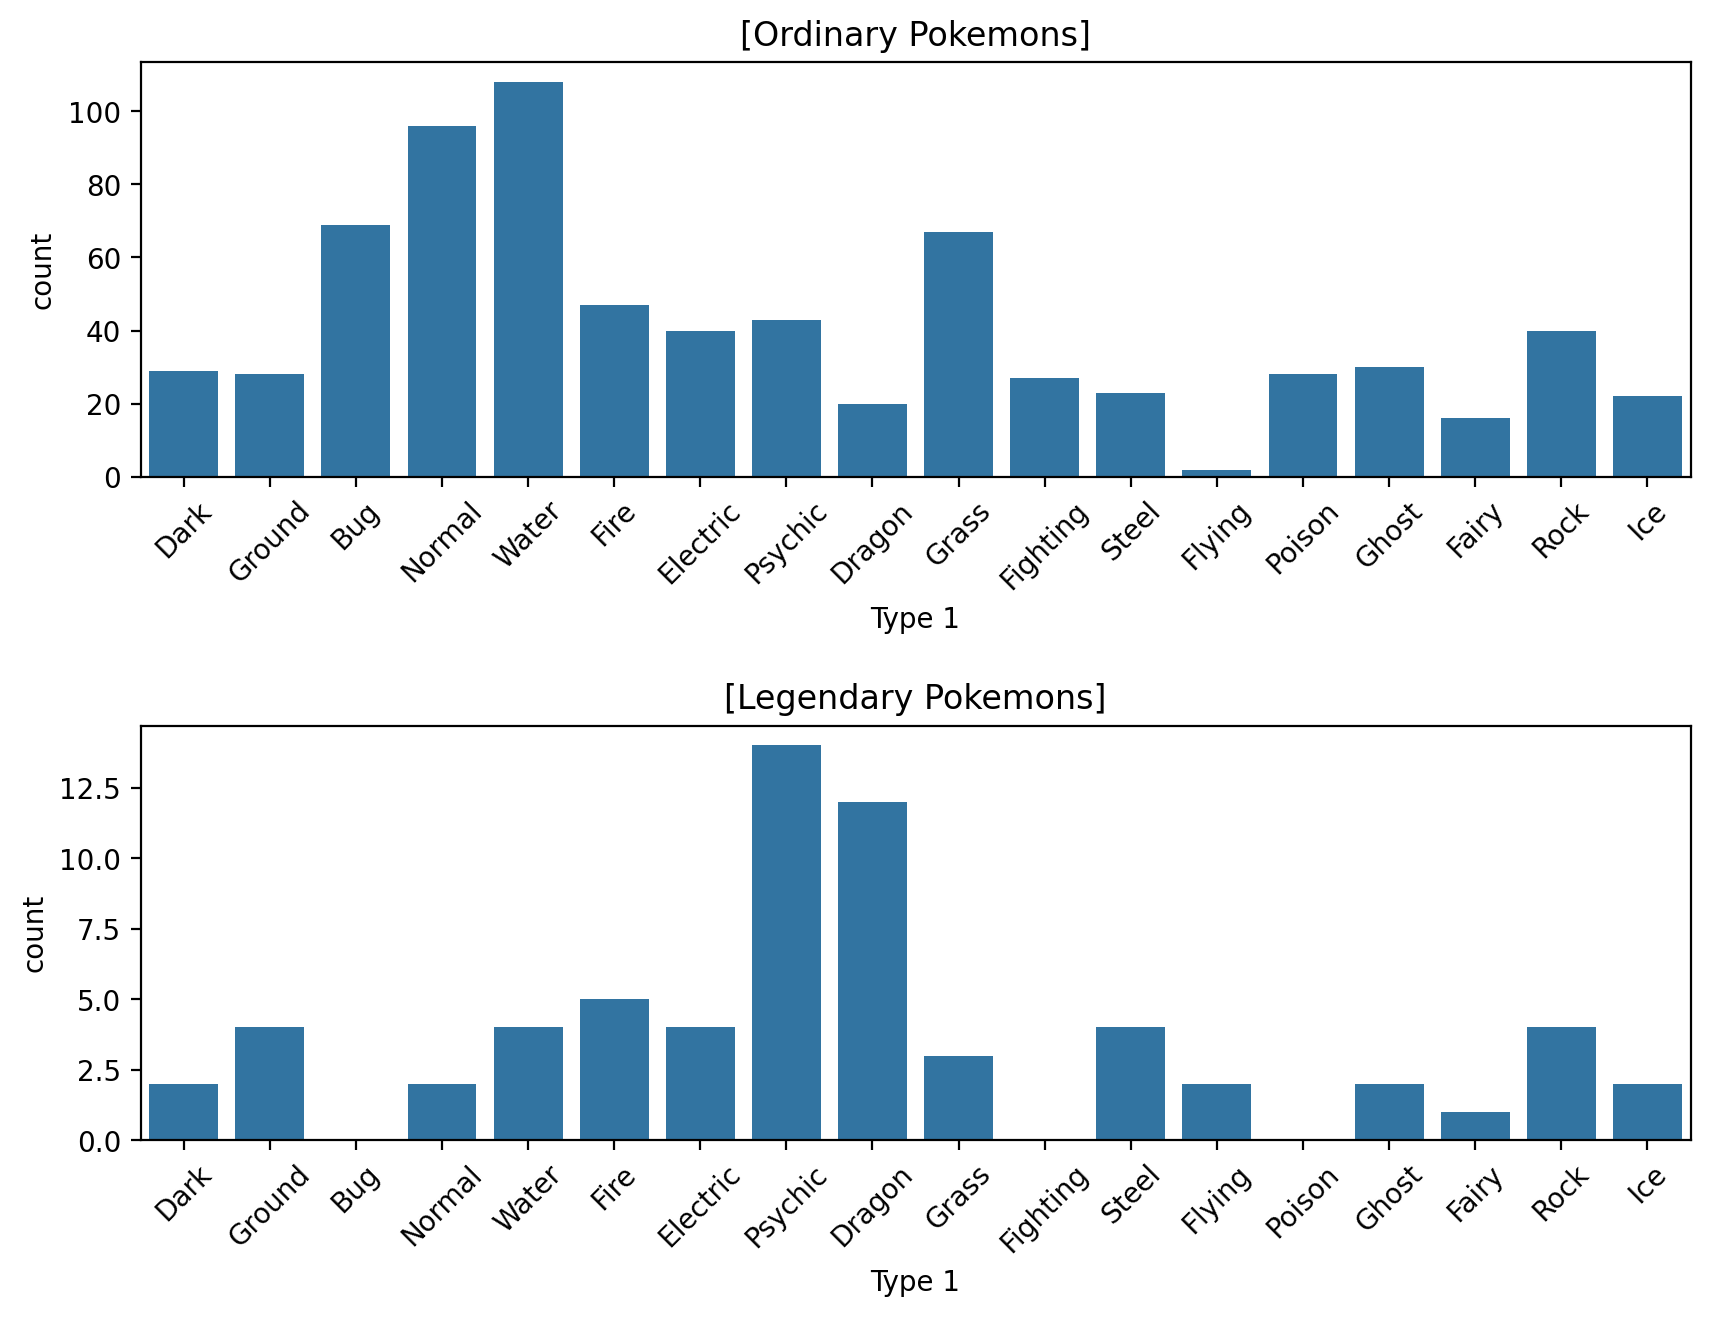

In [ ]:
#  Type 1 일반 포켓몬과 전설의 포켓몬 속성 분포 확인
fig, ax = plt.subplots(2, 1, figsize = (10, 7))

sns.countplot(data=ordinary, x='Type 1', order = types, ax = ax[0])
ax[0].set_title('[Ordinary Pokemons]')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.countplot(data=legendary, x='Type 1', order = types, ax = ax[1])
ax[1].set_title('[Legendary Pokemons]')
ax[1].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace = 0.6)   # 그래프 사이 여백 조정
plt.show()

일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많음

In [ ]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Legendary 비율이 가장 높은 속성은 Flying으로, 50%의 비율을 가짐.  
날아다니는 포켓몬은 꽤 높은 비율로 전설의 포켓몬이다.

### 3.3.2 Type 2 데이터 분포 plot

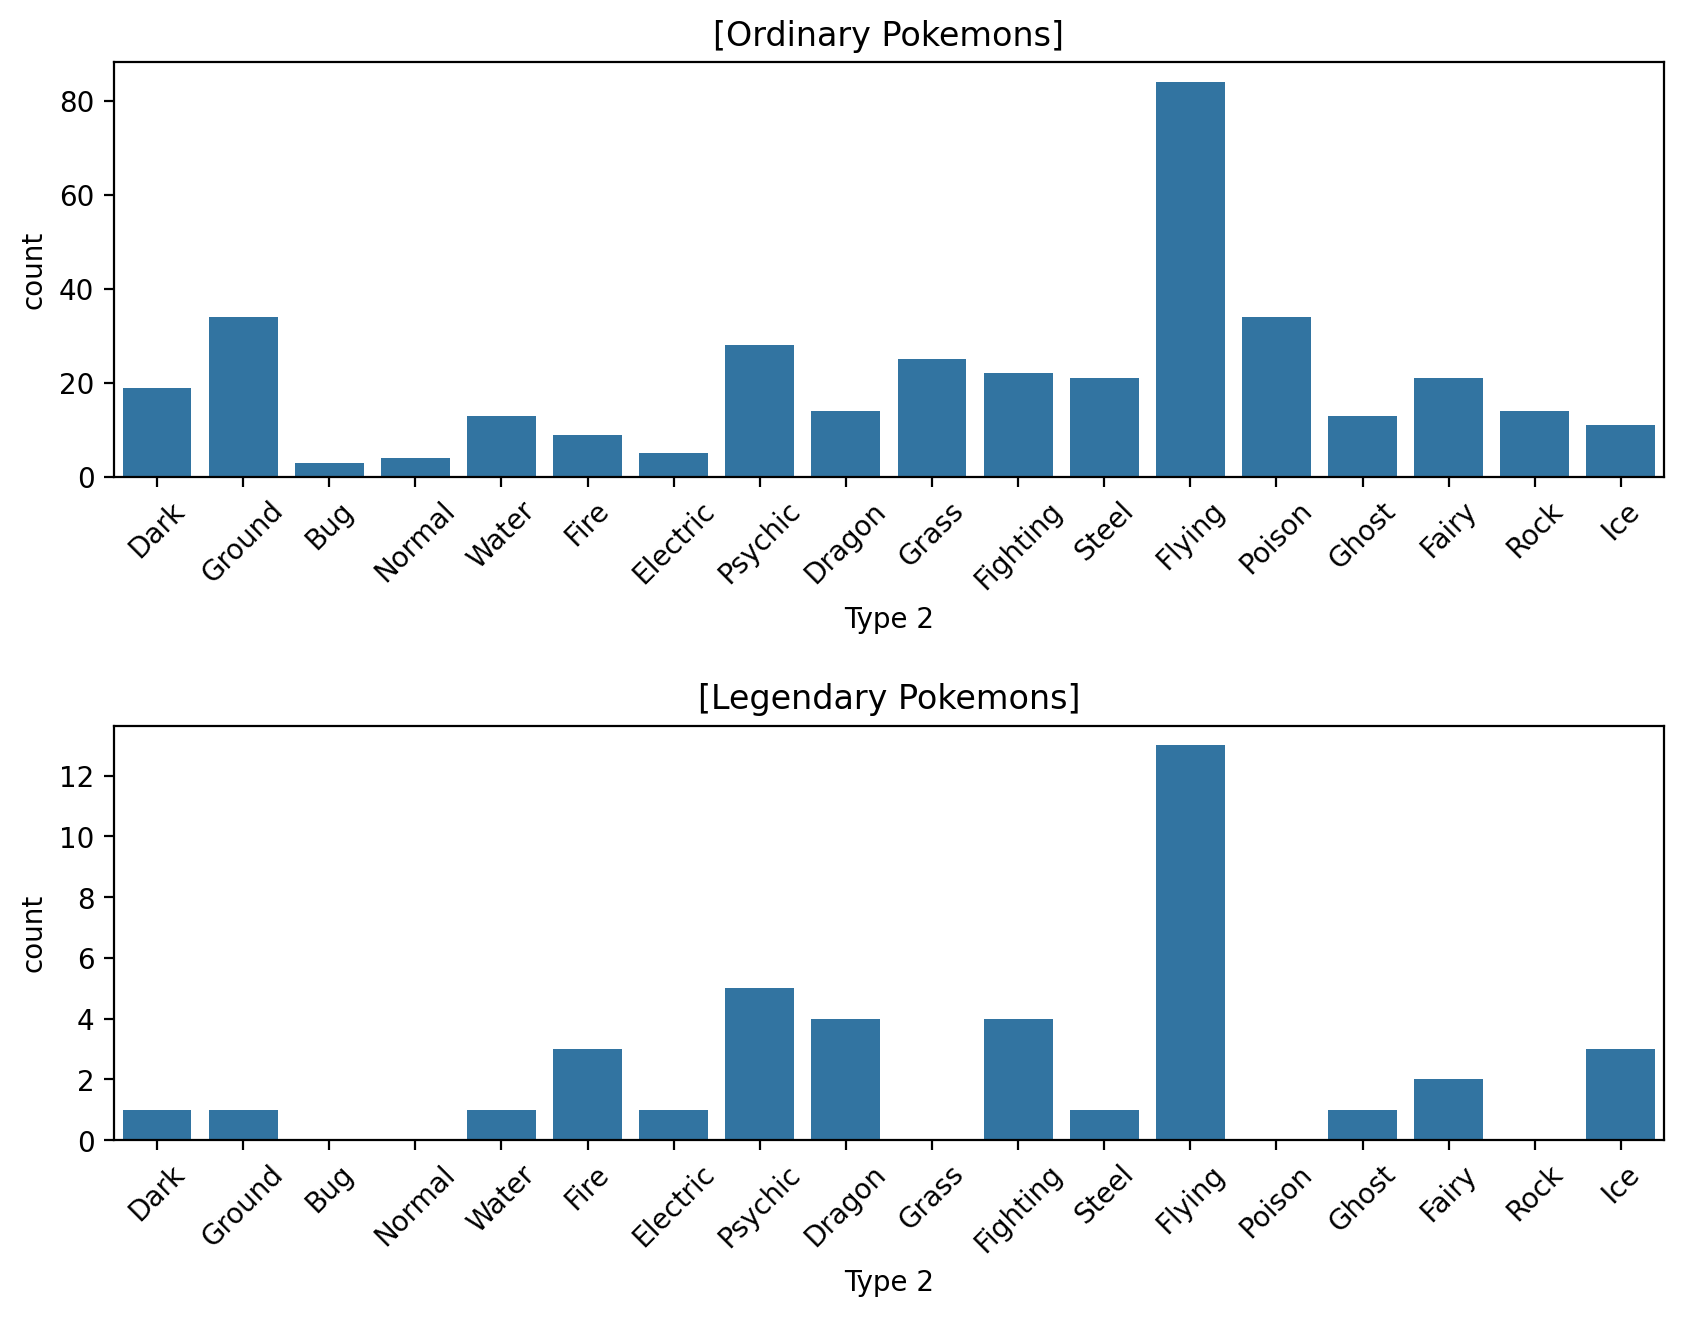

In [ ]:
# Type 2 일반 포켓몬과 전설의 포켓몬 속성 분포 확인
fig, ax = plt.subplots(2, 1, figsize = (10, 7))

sns.countplot(data=ordinary, x='Type 2', order = types, ax = ax[0])
ax[0].set_title('[Ordinary Pokemons]')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.countplot(data=legendary, x='Type 2', order = types, ax = ax[1])
ax[1].set_title('[Legendary Pokemons]')
ax[1].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace = 0.6)   # 그래프 사이 여백 조정
plt.show()

Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없음

In [ ]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높음

## 3.4 Total : 모든 스탯의 총합

In [ ]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [ ]:
#전체 포켓몬에 대해 Total 값이 stats의 총합과 같은지 확인
pokemon['Total'].values.sum() == pokemon[stats].values.sum()

True

### 3.4.1 Total값에 따른 분포 plot

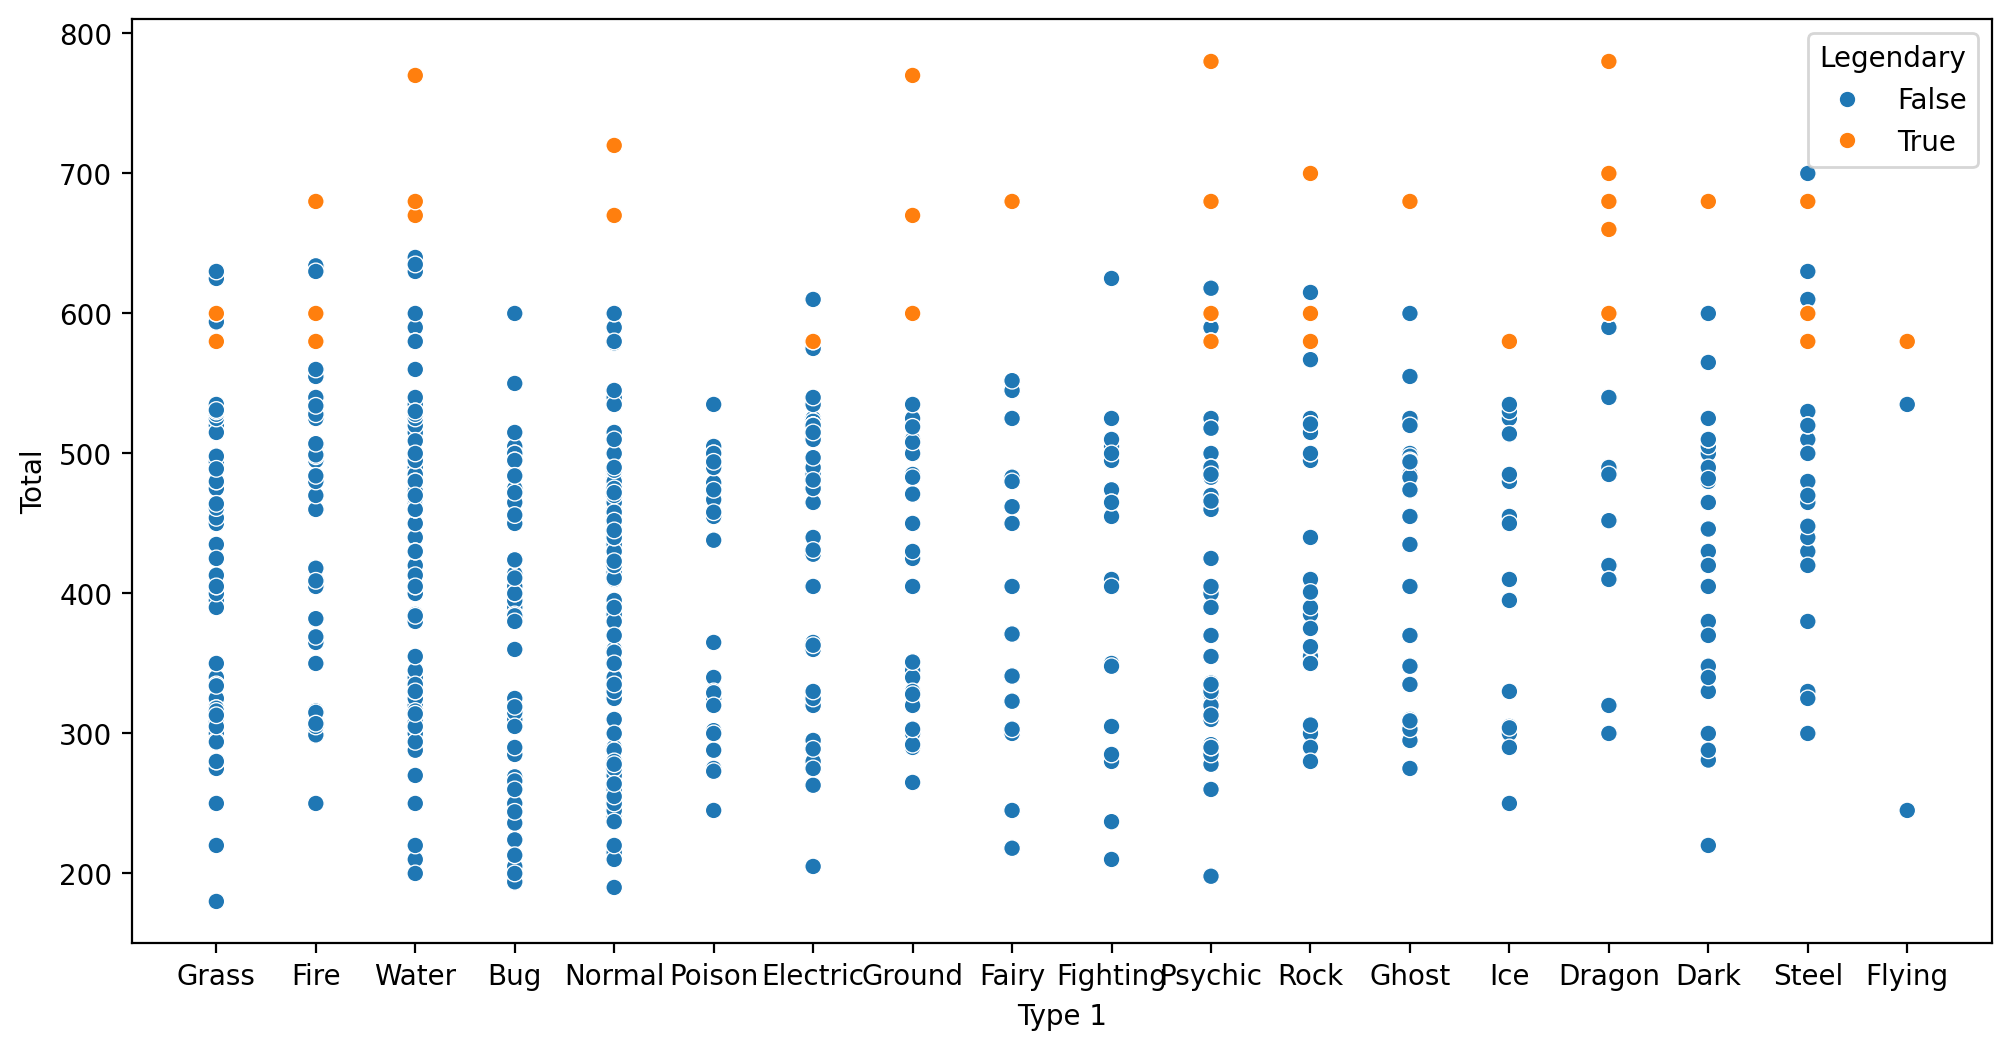

In [ ]:
#tatal별 일반포켓몬과 전설포켓몬의 차이 확인
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

전설의 포켓몬은 주로 Total 스탯 값이 높다

## 3.5 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

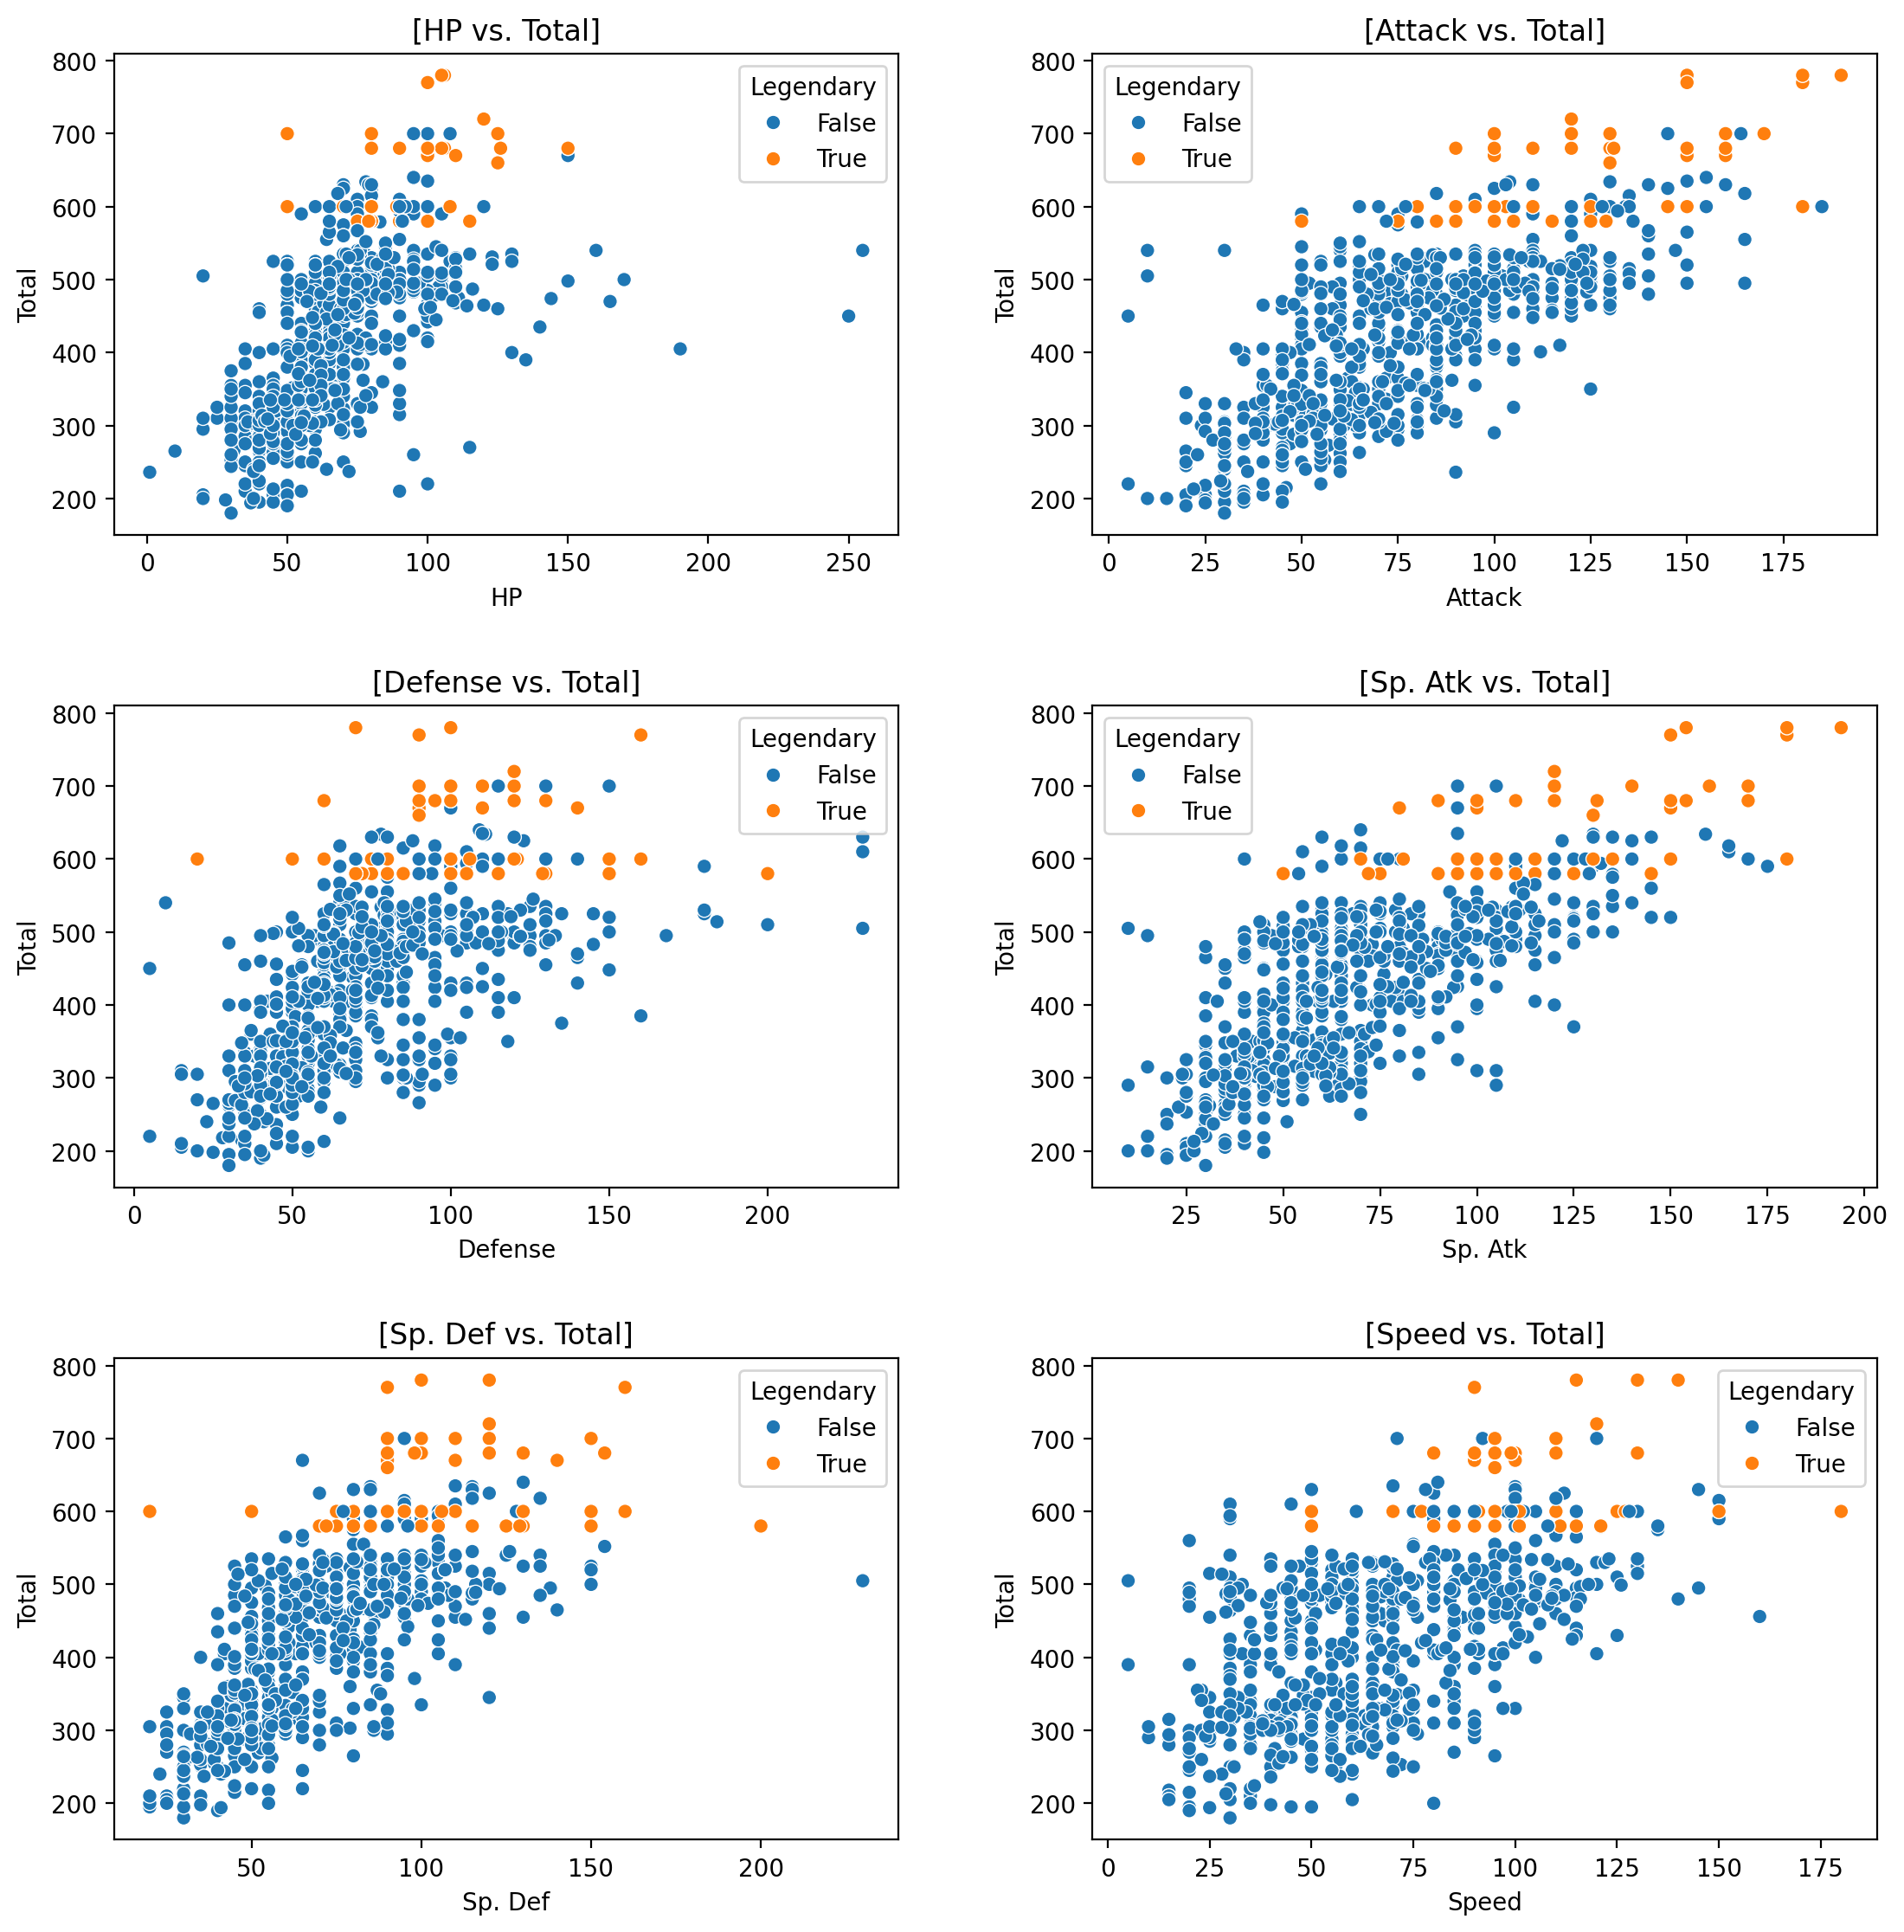

In [ ]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)  # 서브플롯 간의 간격 조정

# stats 리스트를 순회하며 각 스탯에 대한 scatter plot 생성
for i, stat in enumerate(stats):
    row, col = divmod(i, 2)  # 행과 열 위치 계산
    sns.scatterplot(data=pokemon, x=stat, y='Total', hue='Legendary', ax=axes[row, col])
    axes[row, col].set_title(f'[{stat} vs. Total]')
    axes[row, col].set_xlabel(stat)
    axes[row, col].set_ylabel('Total')

plt.show()

- HP, Defense, Sp. Def
    - 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있습니다.
    - 그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보입니다. (ex. 방어형, 공격형 등)

- Attack, Sp. Atk, Speed
    - 이 세 가지 스탯은 Total과 거의 비례합니다.
    - 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

## 3.6 Generation : 포켓몬의 세대


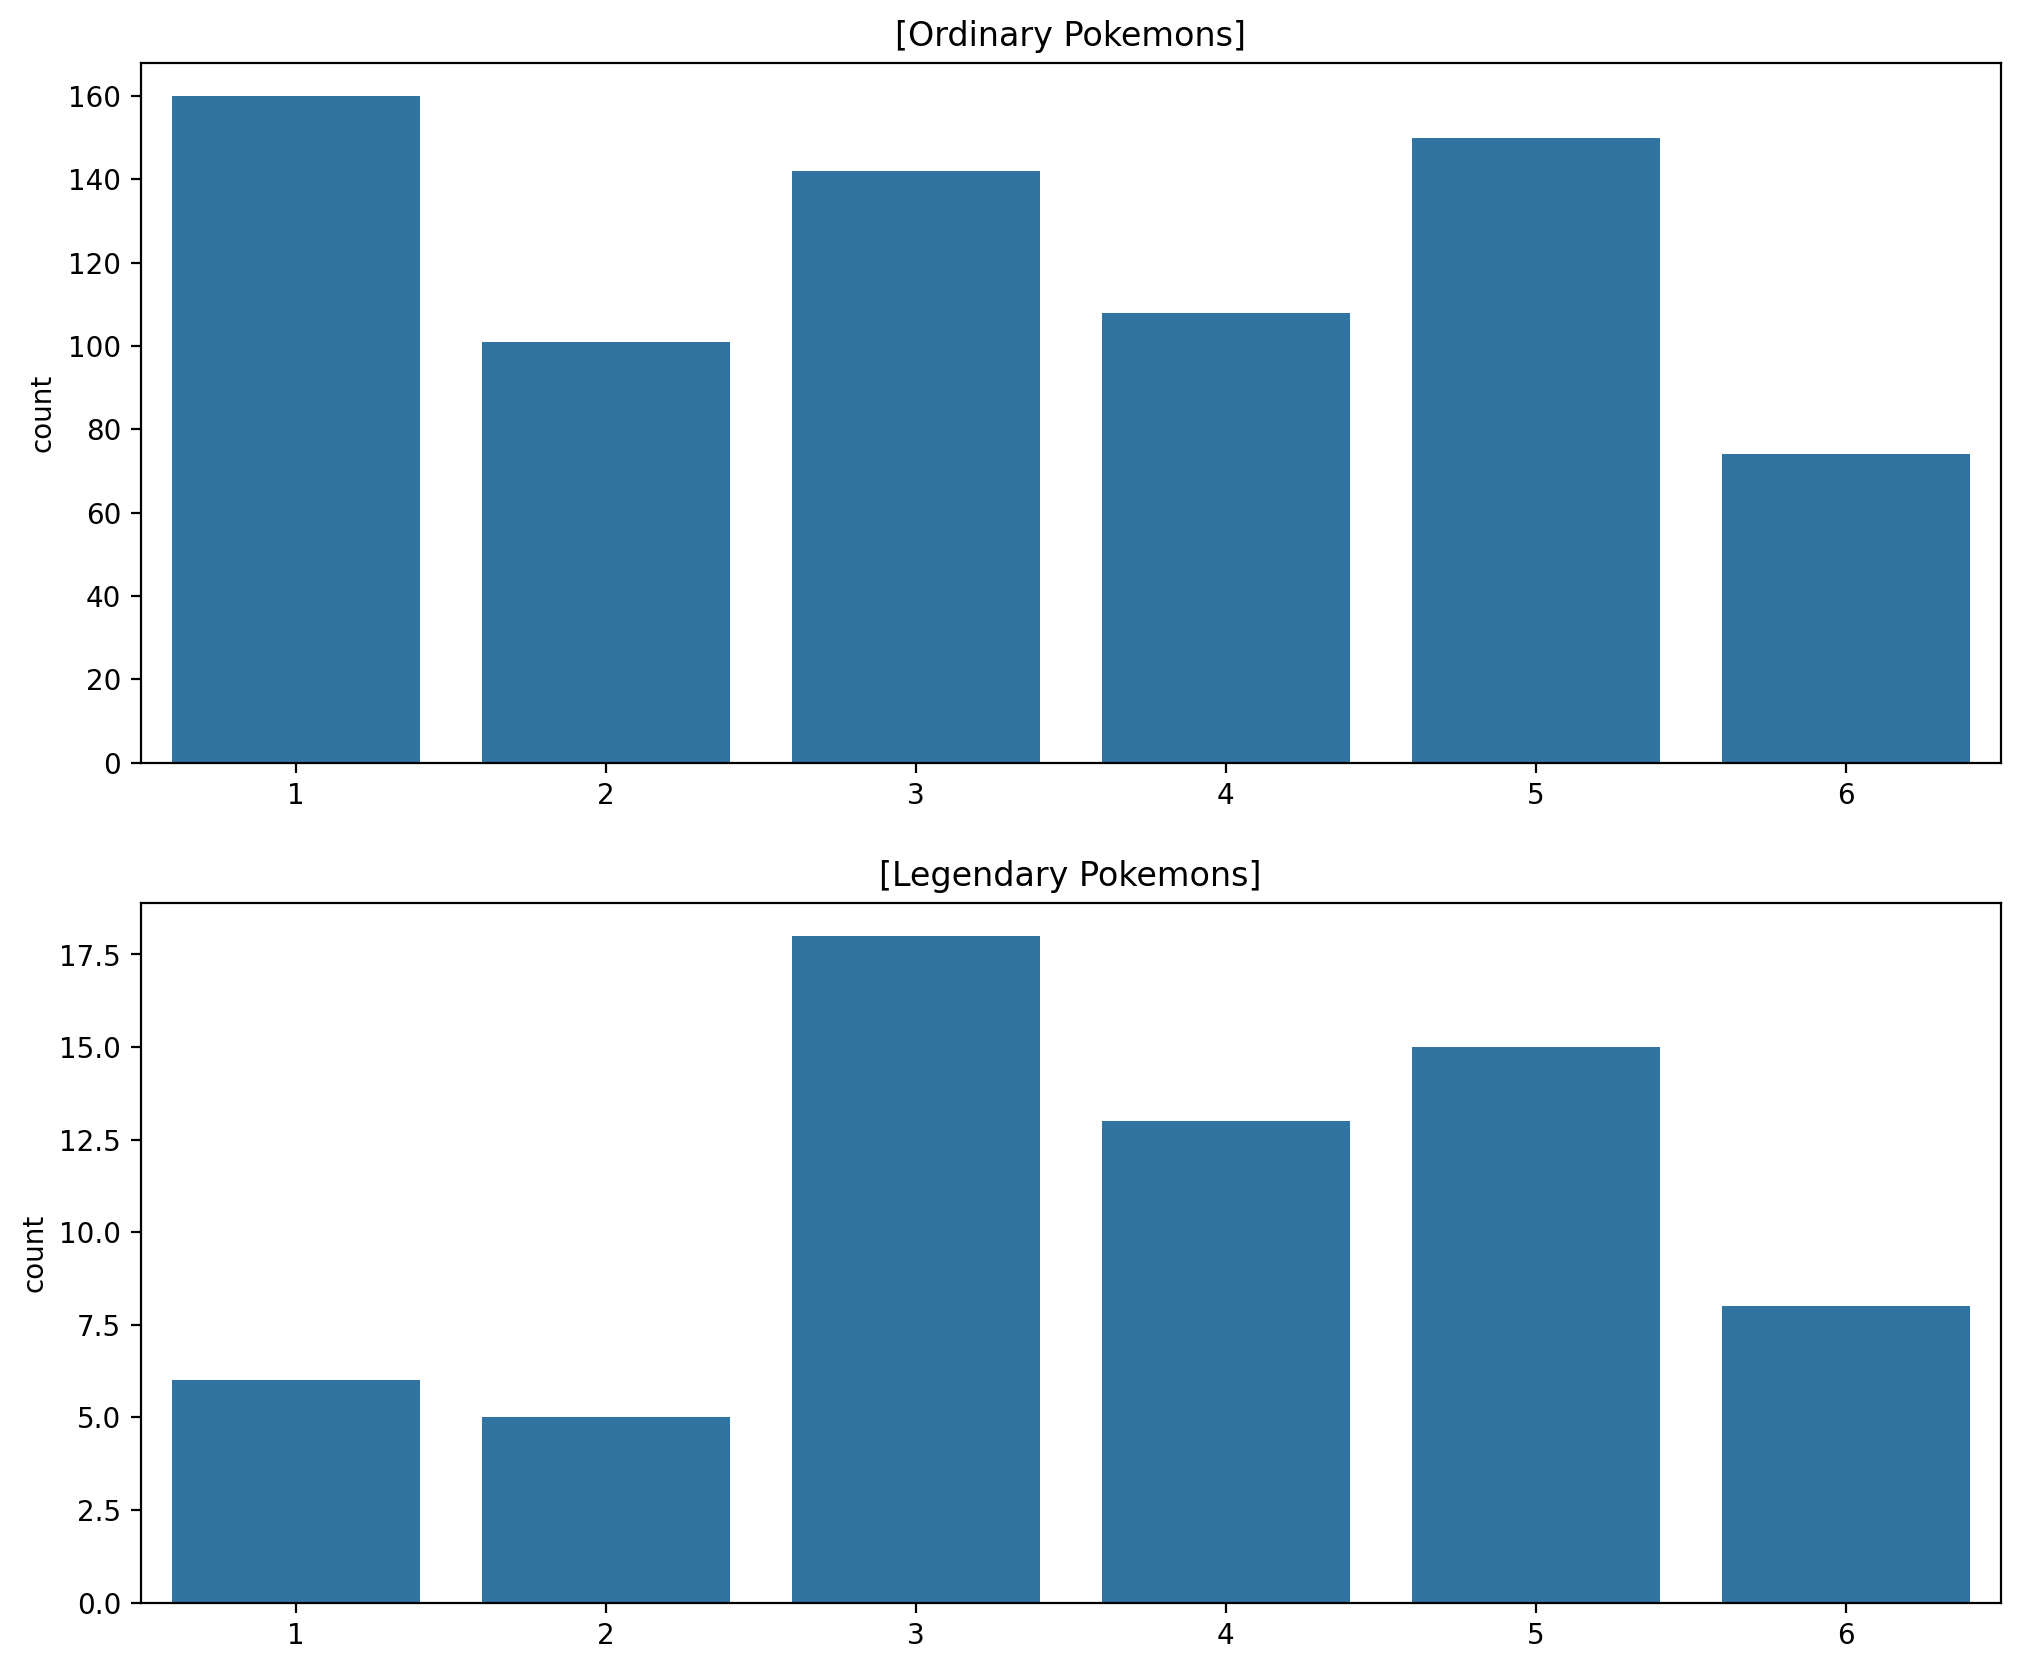

In [ ]:
# Generation 분포 확인
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

전설의 포켓몬은 1, 2세대에는 많지 않았나 보네요. 3세대부터 많아졌다가, 6세대에 다시 줄어든 것을 확인할 수 있습니다.

## 3.7 전설의 포켓몬의 Total 값

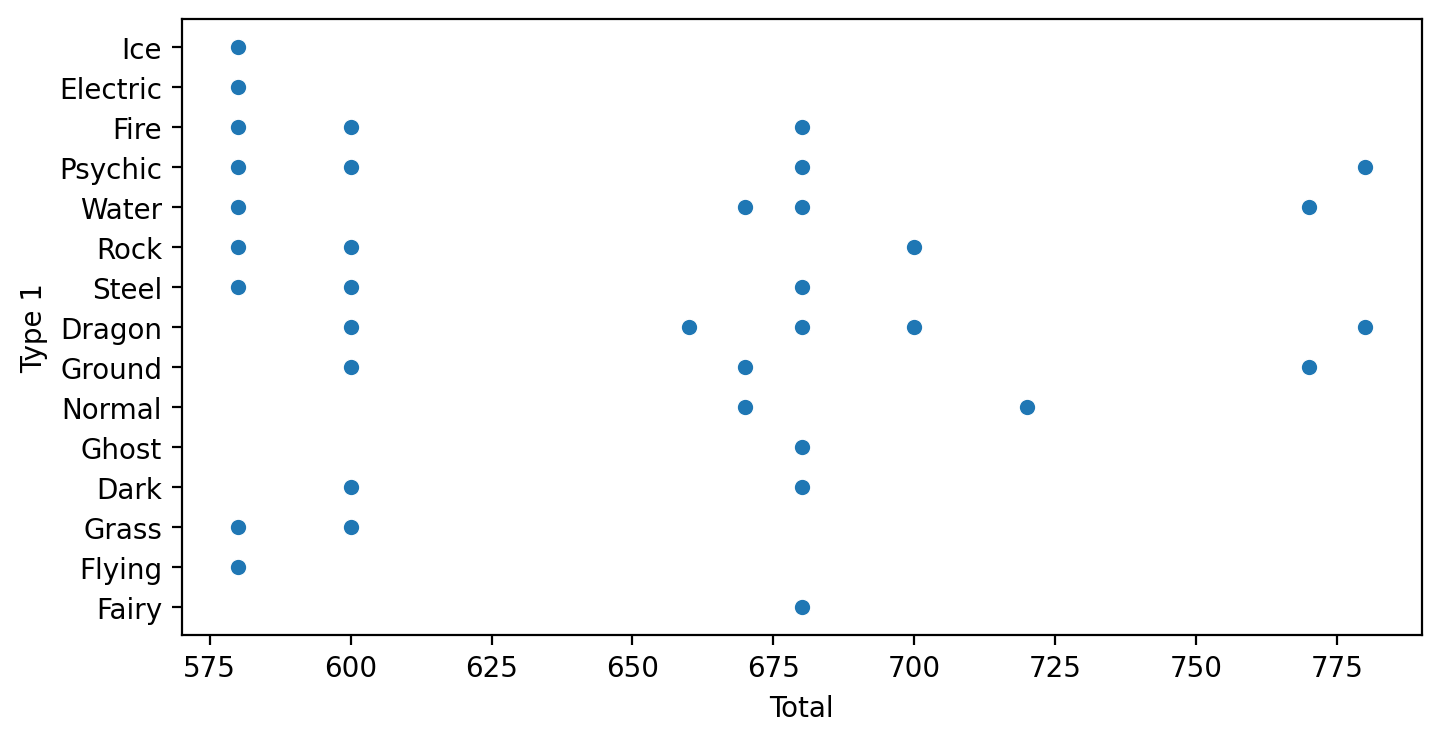

In [ ]:
#  전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [ ]:
#전설의 포켓몬이 가지는 Total값들의 집합
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


전설의 포켓몬 개체수는 많지만 unique total값은 9개에 몰려있음

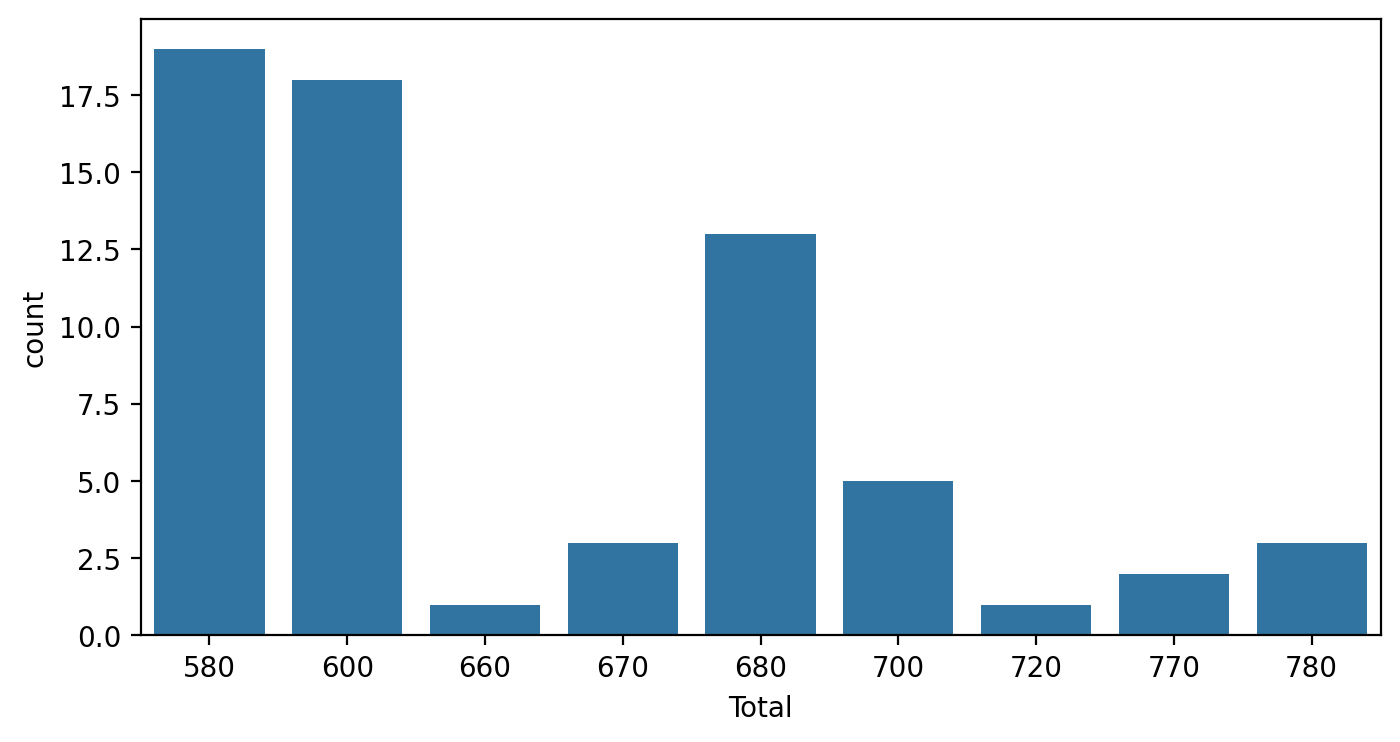

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [ ]:
round(65 / 9, 2)

7.22

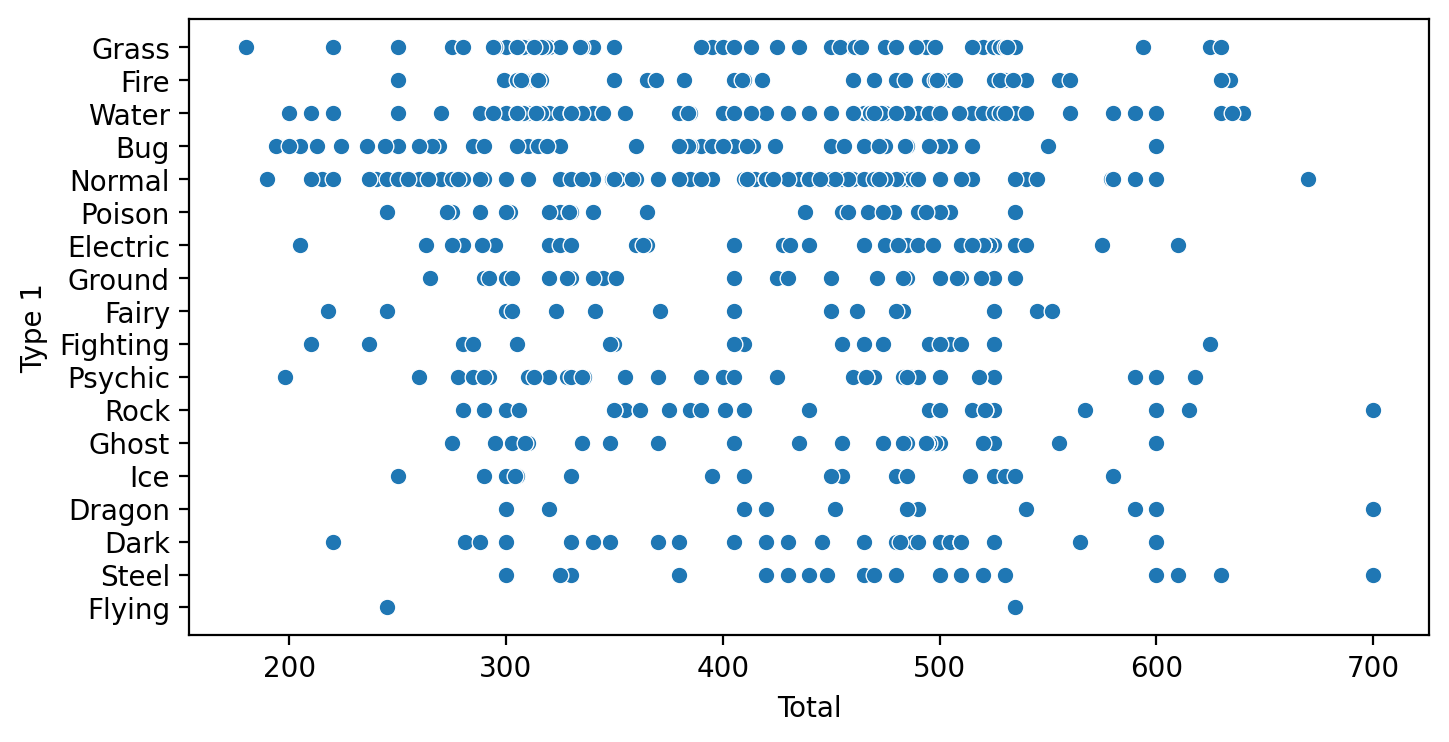

In [ ]:
#  일반 포켓몬들의 Total 값을 속성(Type 1)별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [ ]:
#일반 포켓몬이 가지는 Total값들의 집합
print(len(sorted(list(set(ordinary["Total"])))))

195


일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리이므로,

In [ ]:
round(735 / 195, 2)

3.77

약 3.77마리만 같은 Total 스탯 값을 가지고 있음 <br/>
일반 포켓몬보다 전설 포켓몬은 total값이 다양하지 않음으로 total값이 예측하는데 중요 요소로 보여짐

# 4. Feature Engineering
## 4.1 Name

In [ ]:
# 이름 별 특정단어로 분류
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


이름은 모든 포켓몬이 각각 다른 유일한(unique) 값들로 이루어진 것을 확인했었는데, 전설의 포켓몬 사이에서는 비슷한 이름이 다수 존재

In [ ]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [ ]:
# 전설 포켓몬 이름 길이로 차이 확인
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [ ]:
#일반 포켓몬 이름 길이
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


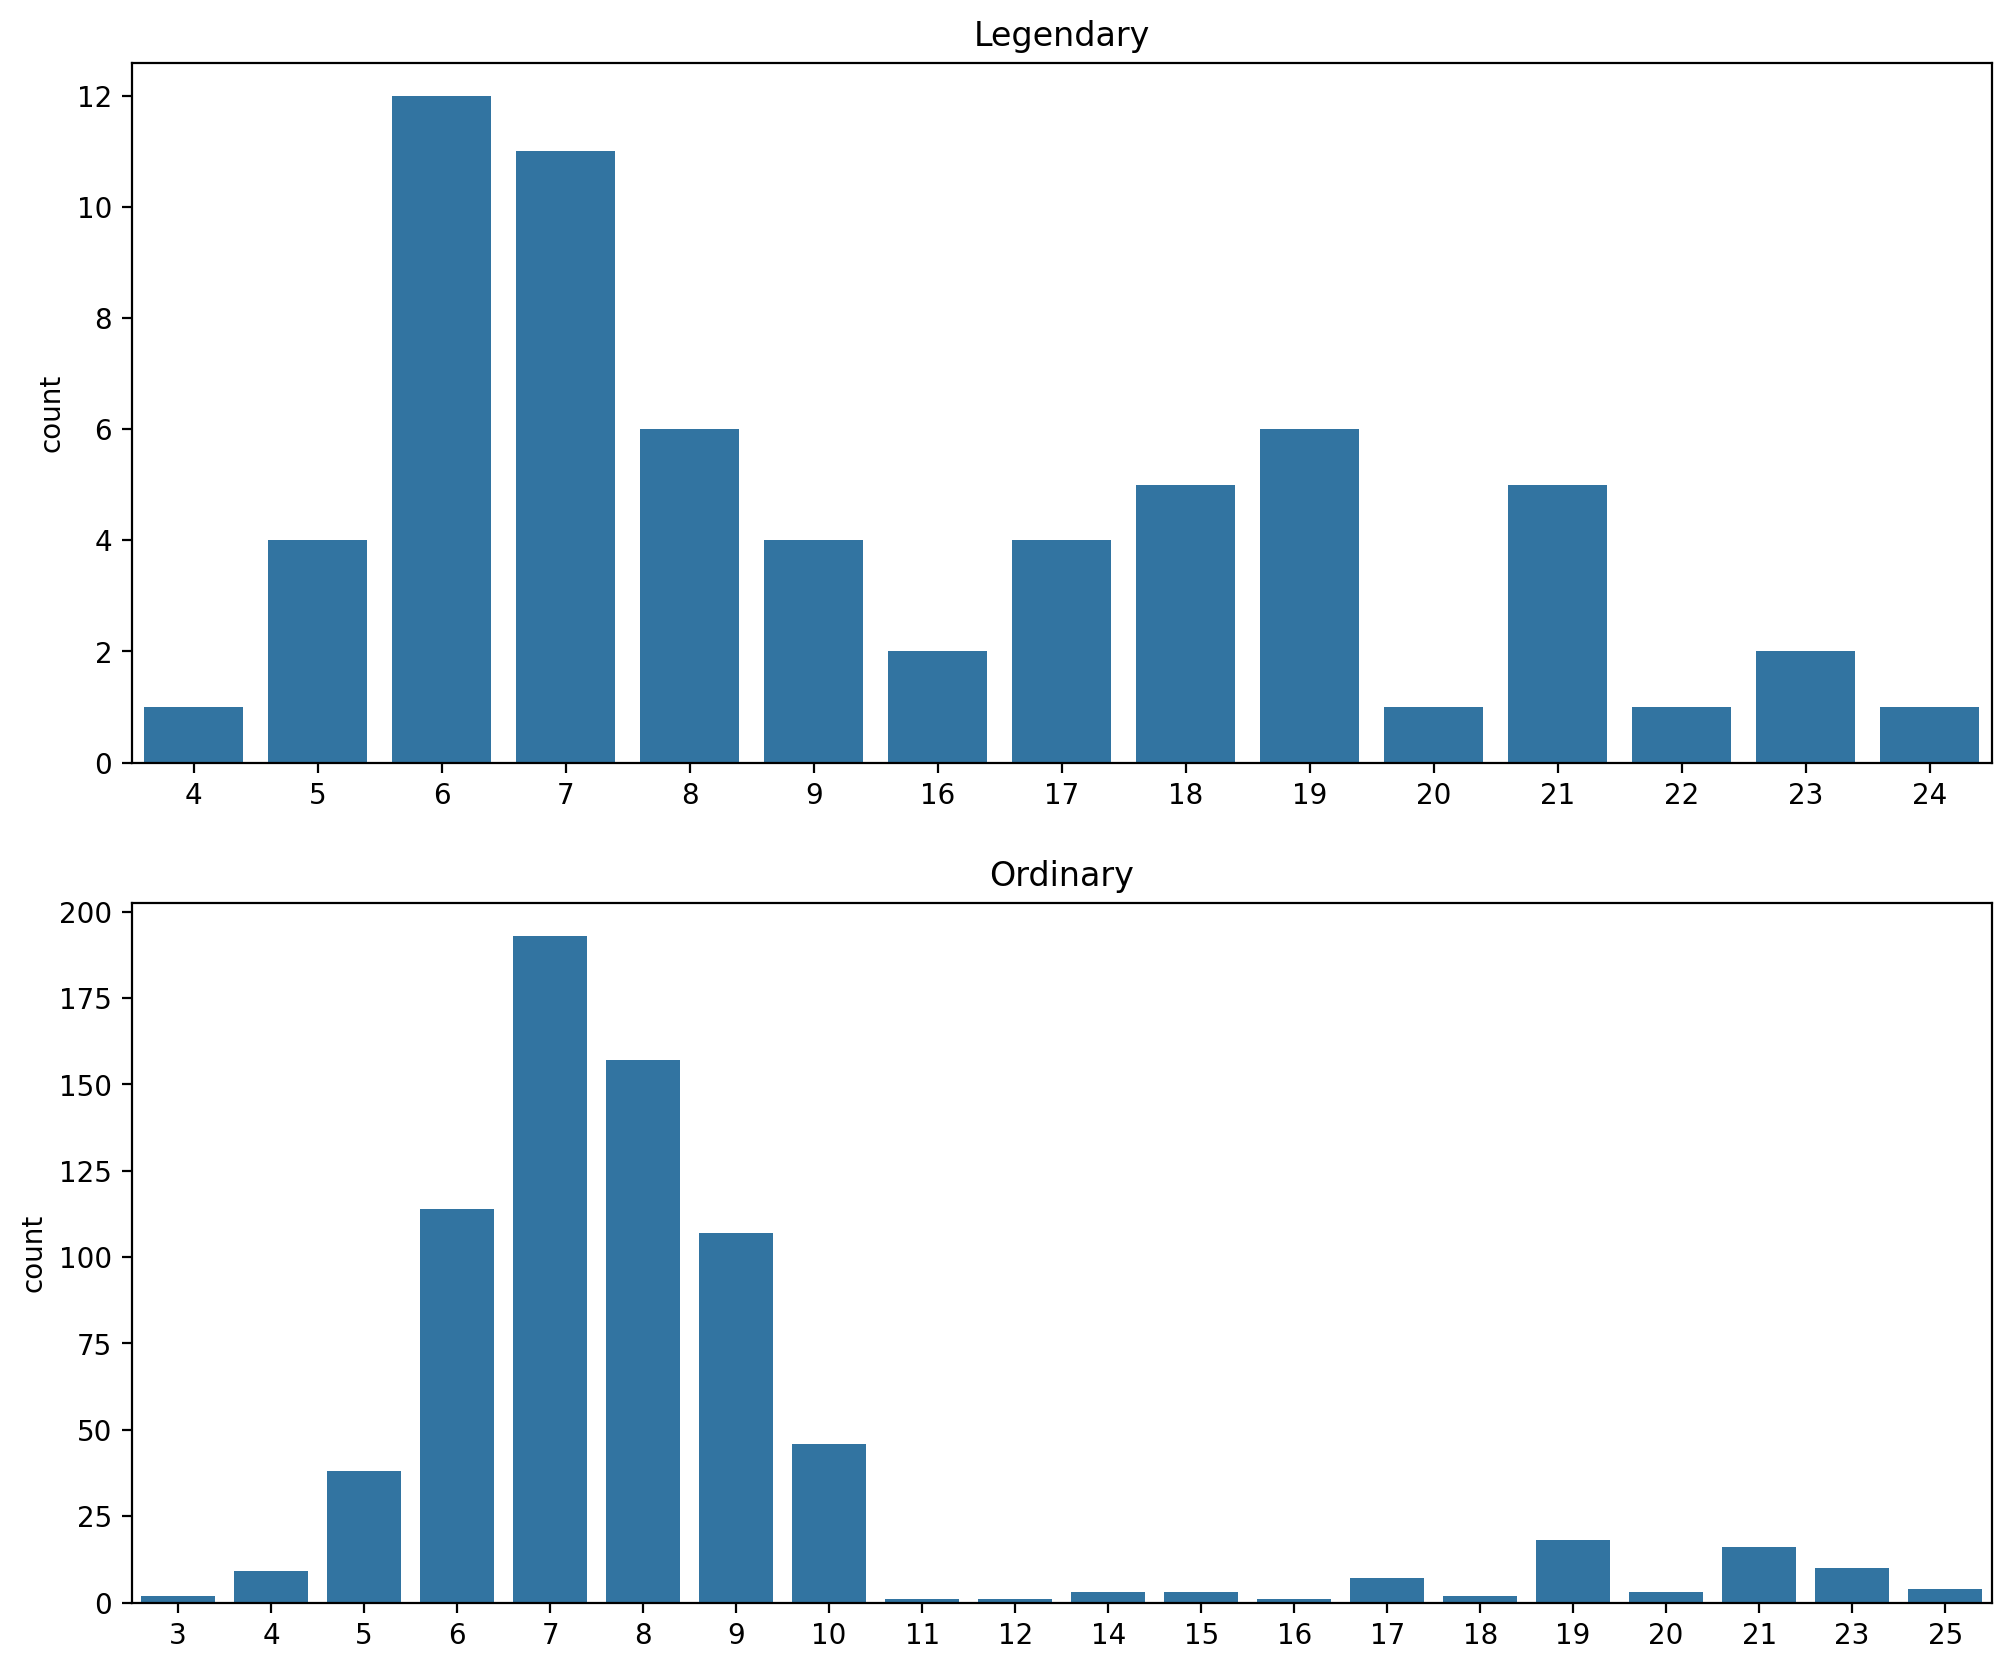

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.

In [ ]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [ ]:
# 일반 포켓몬의 이름이 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 안됨을 확인할 수 있습니다! <br/>
이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는 데에 큰 의미가 있습니다. <br/>
<br/>
위의 두 가지, 이름에 대한 분석은 중요한 시사점을 가집니다.<br/>
<br/>
- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
- 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

앞서 확인한 EDA 과정에서 이름은 전설의 포켓몬인지 아닌지를 결정하는 중요한 특징 중 하나였죠.<br/>
따라서 이름에 관해서는 두 가지를 중점적으로 처리하겠습니다.<br/>

1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

In [ ]:
# 전체 데이터에 name_count 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [ ]:
# 네임 길이수 10자 이상인 항목 long_name 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


다음으로 할 일은 전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만드는 것입니다.<br/>
이름에 어떤 토큰이 있으면 전설의 포켓몬일 확률이 높을지를 찾아보는 것이죠.<br/>
<br/>
토큰을 추출하기에 앞서, 포켓몬의 이름에 대해 먼저 알아보겠습니다.<br/>
포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.<br/>
<br/>
한 단어면 ex. Venusaur<br/>
두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur<br/>
이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X<br/>
알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme<br/>
<br/>
이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기<br/>
이 중 가장 먼저 '알파벳이 아닌 문자'를 포함하는 경우를 처리하도록 하겠습니다.<br/>
어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용하면 편리합니다.<br/>
우리는 알파벳이 아닌 문자를 포함하는 이름을 걸러내고 싶은데, 주의할 점은 이름에 띄어쓰기가 있는 경우에도 isalpha() = False로 처리된다는 점입니다.<br/>
따라서 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인하도록 하겠습니다.

In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [ ]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [ ]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기<br/>
그러면 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있습니다.<br/>
이름에 있는 토큰을 추출하기 위해 이름을 토큰화 (모든 토큰으로 분리) 할 수 있는 함수를 생성해 주겠습니다.<br/>
<br/>
문자열을 처리할 때는 주로 정규표현식(RegEx: Regular Expression) 이라는 기법이 사용됩니다.<br/>
정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구입니다.<br/>
<br/>
정규표현식은 문자열을 다룰 때 아주 유용한 도구지만, 사실 깊게 들어가면 아주 복잡하고 어렵습니다.<br/>
따라서 오늘은 맛보기와 같은 형태로 코드를 받아들이면서 진행해 보겠습니다.

In [ ]:
import re

In [ ]:
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [ ]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [ ]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [ ]:
from collections import Counter

In [ ]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

# 5. 인코딩

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(types)

['Psychic', 'Dragon', 'Fire', 'Ice', 'Ghost', 'Poison', 'Bug', 'Grass', 'Normal', 'Rock', 'Dark', 'Electric', 'Fighting', 'Fairy', 'Steel', 'Flying', 'Water', 'Ground']


In [ ]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Psychic,Dragon,Fire,Ice,Ghost,Poison,Bug,Grass,Normal,Rock,Dark,Electric,Fighting,Fairy,Steel,Flying,Water,Ground
0,Grass,Poison,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [ ]:
target = 'Legendary'

In [ ]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [ ]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [ ]:
len(legendary)

65

전체데이터 800 중 65만 전설 포켓몬으로 현재 데이터는 불균형 데이터 <br/>
accuracy 보다는 다른 지표로 확인이 필요

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



recalldl 62%로 낮아보임

# 6. 로지스틱 회귀 모델을 통한 독립변수와 종속변수(전설) 관계 설명

In [ ]:
# 1. stats model 의 GLM 을 통한 평가를 위해 bool 타입의 데이터를 0, 1 의 정수타입으로 변환
bool_columns = ['long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

X[bool_columns] = X[bool_columns].astype(int)
X.head()

<ipython-input-91-a7d073e19df4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bool_columns] = X[bool_columns].astype(int)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,0,...,0,0,0,0,0,0,0,1,0,0
1,405,60,62,63,80,80,60,1,7,0,...,0,0,0,0,0,0,0,1,0,0
2,525,80,82,83,100,100,80,1,8,0,...,0,0,0,0,0,0,0,1,0,0
3,625,80,100,123,122,120,80,1,21,1,...,0,0,0,0,0,0,0,1,0,0
4,309,39,52,43,60,50,65,1,10,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm

# 2. target 데이터 또한 0, 1 정수형으로 변환
y_numbers = [1 if yi == True else 0 for yi in y]

# 3. statsmodels 의 GLM 함수를 통해 로지스틱 회귀 결과 보고서 출력
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1),
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  800
Model:                            GLM   Df Residuals:                      762
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.142
Date:                Mon, 19 Feb 2024   Deviance:                       26.285
Time:                        06:22:36   Pearson chi2:                     68.3
No. Iterations:                    25   Pseudo R-squ. (CS):             0.4118
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Total          0.1855      0.061      3.063      0.0

해석
1. Total, const 를 제외한 나머지 변수의 회귀계수는 p값이 유의수준보다 높게 나왔는데, 이는 두 변수를 제외한 나머지 변수의 회귀계수는 통계적으로 유의미하지 않음을 나타낸다.


2. Total 의 회귀계수(0.1855)의 경우, Total 값이 1 단위 증가할 때 포켓몬이 전설일 확률이 그렇지 않을 확률보다 평균적으로 1.2배 높음을 의미한다(오즈비 해석).


3. 결과적으로 선형 모델로 포켓몬이 전설일 확률을 설명하는 것은 Total 변수 외 유의미하지 않으므로 비선형 모델을 통한 예측 테스크를 수행하는 것이 적절하다고 결론을 내린다.

In [ ]:
np.exp(0.1855)

1.2038201997751343

# 7. 머신러닝

### 7.1 의사결정트리(피쳐 엔지니어링 적용)

In [ ]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Psychic', 'Dragon', 'Fire', 'Ice', 'Ghost', 'Poison', 'Bug', 'Grass',
       'Normal', 'Rock', 'Dark', 'Electric', 'Fighting', 'Fairy', 'Steel',
       'Flying', 'Water', 'Ground'],
      dtype='object')


In [ ]:
# 필요한 컬럼만 필터
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [ ]:
target = "Legendary"
target

'Legendary'

In [ ]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



### 7.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model

RandomForestClassifier(random_state=0)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[132,   6],
       [  7,  15]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.96      0.95       138
        True       0.71      0.68      0.70        22

    accuracy                           0.92       160
   macro avg       0.83      0.82      0.83       160
weighted avg       0.92      0.92      0.92       160



### Random Forest - 하이퍼파라미터 튜닝

- **n_estimators** (기본값 100) : 트리의 수
- criterion (기본값 gini) : 불순도 지표
- **max_depth** (기본값 None) : 최대 한도 깊이
- min_samples_split (기본값 2) : 자식 노드를 갖기 위한 최소한의 데이터 수
- min_samples_leaf (기본값 1) : 리프 노드가 되기 위한 최소 샘플 수

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100, 200],
        'max_depth':[3, 5, 7],
        'min_samples_split':[2, 3, 5],
        'min_samples_leaf':[1, 2, 3]
        }

model = RandomForestClassifier(random_state=0)
grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200]})

In [ ]:
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
model = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 7,
    min_samples_split = 5,
    min_samples_leaf = 2
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[132   6]
 [  5  17]]
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       138
        True       0.74      0.77      0.76        22

    accuracy                           0.93       160
   macro avg       0.85      0.86      0.86       160
weighted avg       0.93      0.93      0.93       160



### 7.3 XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[132,   6],
       [  3,  19]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       138
        True       0.76      0.86      0.81        22

    accuracy                           0.94       160
   macro avg       0.87      0.91      0.89       160
weighted avg       0.95      0.94      0.95       160



### XGBoost - 하이퍼파라미터 튜닝

- booster (기본값 gbtree) : 부스팅 알고리즘 (또는 dart, gblinear)
- objective (기본값 binary:logistic) : 이진분류 (다중분류: multi:softmax)
- max_depth (기본값 6) : 최대 한도 깊이
- **learning_rate** (기본값1) : 학습률
    - 값이 크면 자칫 기울기가 0인 지점을 찾지 못하게 될 수 있고,
    값이 작으면 시간이 너무 많이 소요됨
    - 적절하게 조절해주는 것이 좋음
- **n_estimators** (기본값 100) : 트리의 수
    - learning rate 값을 작게 설정했다면 n_estimators의 값은 크게 설정해야 함
    - 두 값이 모두 작다면 기울기가 0이 되는 지점을 찾기도 전에 학습이 종료될 가능성이 높음
- subsample (기본값 1) : 훈련 샘플 개수의 비율
- colsample_bytree (기본값 1) : 특성(피쳐) 개수의 비율
- n_jobs (기본값 1) : 사용 코어 (cpu) 수 (-1: 모든 코어를 다 사용)

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'learning_rate':[0.07, 0.05],
        'max_depth':[3, 5, 7],
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

xgb = XGBClassifier()
grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [ ]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}

In [ ]:
xgb = XGBClassifier(
    learning_rate = 0.05,
    max_depth = 5,
    n_estimators = 100,
    subsample = 0.9
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[132   6]
 [  1  21]]
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       138
        True       0.78      0.95      0.86        22

    accuracy                           0.96       160
   macro avg       0.89      0.96      0.92       160
weighted avg       0.96      0.96      0.96       160



# 회고

**박규리**  
분석 목적을 자유롭게 정할 수 있는 데이터는 처음이라 신선했습니다.  
다른 타겟 분석도 진행해 보고 싶었는데 시간이 부족할 듯 해서 시도해보지 못한 게 아쉬워요. 개인적으로 시도해봐야 할 것 같습니다.  
마지막에 머신러닝 모델링 코드 붙여넣을 때 아무생각 없이 예전 코드 붙여 넣었다가 결과가 이상하게 나오는 사단이 났는데 역시 코드 재활용도 다시봐야 하는 것 같습니다.  
그래도 다른 분들이 코드 틀린 것도 잘 찾아주셔서 덜 헤매고 금방 해결해서 다행이었습니다🤣  
코랩 사용은 아직도 조금 어색합니다...계속 협업하다보면 익숙해지겠죠?

**김도현**

: 주어진 과제에서 로지스틱 모델을 통해 독립변수와 종속변수(포켓몬이 전설인 경우)을 설명하는 시도를 통해 선형모델의 설명력보다 비선형모델의 예측 테스크를 수행해야 하는 근거를 찾을 수 있었다. 앙상블 모델에 gridsearch 방법을 적용하여 최적의 하이퍼파라미트를 탐색하였고 예측성능(recall) 92 에서 95 로 향상시키는 결과를 얻었다. 다양한 관점과 방법론을 적용하면서 지금까지 배운 내용들이 정리되고 이해가 부족했던 부분도 진단할 수 있었다.

**양동영**

포켓몬이라는 친숙한 데이터셋으로 진행하다보니 데이터를 처리할 때 도메인 지식의 중요
성에 대해 느낄 수 있었습니다.
이름 길이같이 새로운 방법으로도 피처 엔지니어링을 진행했을 때 좋은 결과가 나와 더 다양한 시야로 데이터를 접근하는 것이 필요하다는 것을 배웠습니다.
개인이 아닌 팀 프로젝트 시 업무와 시간 배분은 매번 아쉽지만 서로 점점 익숙해지며 더 나은 결과물들이 만들어지고 있는 것 같습니다
